In [2]:
import pandas as pd
import os, sys
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils import NnClass

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(os.path.join('..', 'database', 'meta', 'mini_train_data.csv'))

In [4]:
# Extract labels and pixel values
labels = df['label'].values.astype(np.int64)
features = df.drop(columns=['label']).values.astype(np.float32)
features /= 255.0
# features = features.reshape(-1, 1, 313, 224)


labels = pd.get_dummies(labels, columns=['Label'], dtype=int).values   #onehot encoding
print("features shape:", features.shape)
print("labels shape:", labels.shape)

features shape: (653, 70113)
labels shape: (653, 10)


In [5]:
trset,vset=NnClass.tv_split(df,0.8,semilla=99)

trFeatures = trset.drop(columns=['label']).values.astype(np.float32)
trFeatures /= 255.0
trLabels=trset["label"].values.astype(np.int64)
trLabels = pd.get_dummies(trLabels, columns=['Label'], dtype=int).values   #onehot encoding

vFeatures = vset.drop(columns=['label']).values.astype(np.float32)
vFeatures /= 255.0
vLabels=vset["label"].values.astype(np.int64)
vLabels = pd.get_dummies(vLabels, columns=['Label'], dtype=int).values   #onehot encoding

fcnn=NnClass.Nn(trainX=trFeatures, trainY=trLabels,m=[512, 128, 32],seed=99)

Epoch 1/100 - Train Loss: 5.7405 - Val Loss: 5.6365
Epoch 6/100 - Train Loss: 0.5316 - Val Loss: 1.5952
Epoch 11/100 - Train Loss: 0.2555 - Val Loss: 1.4376
Epoch 16/100 - Train Loss: 0.1418 - Val Loss: 1.4736
Epoch 21/100 - Train Loss: 0.0830 - Val Loss: 1.4586
Epoch 26/100 - Train Loss: 0.0520 - Val Loss: 1.4892
Epoch 31/100 - Train Loss: 0.0355 - Val Loss: 1.5016
Epoch 36/100 - Train Loss: 0.0230 - Val Loss: 1.5697
Epoch 41/100 - Train Loss: 0.0158 - Val Loss: 1.6041
Epoch 46/100 - Train Loss: 0.0109 - Val Loss: 1.6561
Epoch 51/100 - Train Loss: 0.0078 - Val Loss: 1.6782
Epoch 56/100 - Train Loss: 0.0057 - Val Loss: 1.7415
Epoch 61/100 - Train Loss: 0.0043 - Val Loss: 1.8090
Early stopping at epoch 61


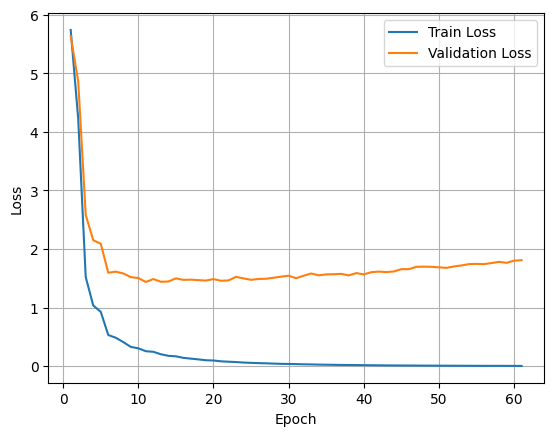

In [6]:
fcnn.trainUltimate(
    epochs=100,
    lr=0.001,
    batch_size=32,
    optimizer='adam',
    l2_lambda=1e-4,
    valX=vFeatures,
    valy=vLabels,
    early_stopping=True,
    patience=10,
    eval_interval=5,
    lr_schedule={'type': 'exponential', 'decay': 0.95}
)